## Raj Choudhary

## 16BCE1384

## Repository-link: https://github.com/raj1603chdry/CSE4020-MachineLearningLabs
<br /><br />

<p style="color: purple; font-size: 2em">Importing the libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
graduate_data = pd.read_csv('../datasets/ameo_dataset/processed_dataset/X.csv')
graduate_data.tail()

10percentage  12percentage  collegeGPA  English  Logical  Quant  \
3993         52.09         55.50       61.50      365      334    475   
3994         90.00         93.00       77.30      415      410    535   
3995         81.86         65.50       70.00      475      475    465   
3996         78.72         69.88       70.42      450      410    320   
3997         70.60         68.00       68.00      565      515    464   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
3993  0.276047                  345                      0                0   
3994  0.881620                  325                    420                0   
3995  0.488348                  405                      0                0   
3996  0.744758                  445                      0              438   
3997  0.600057                  435                      0                0   

          ...        GraduationYear_2016  GraduationYear_2017  Gender_f  \
3993      ...                          0                    0         0   
3994      ...                          0                    0         1   
3995      ...                          0                    0         0   
3996      ...                          0                    0         1   
3997      ...                          0                    0         1   

      Gender_m  Degree_B.Tech/B.E.  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
3993         1                   1                     0                    0   
3994         0                   1                     0                    0   
3995         1                   1                     0                    0   
3996         0                   1                     0                    0   
3997         0                   1                     0                    0   

      Degree_MCA  CollegeTier_1  CollegeTier_2  
3993           0              0              1  
3994           0              0              1  
3995           0              0              1  
3996           0              0              1  
3997           0              0              1  

[5 rows x 70 columns]

In [3]:
salary_category = pd.read_csv('../datasets/ameo_dataset/processed_dataset/y_cat.csv')
salary_category.tail()

Salary
3993   (180000.0, 300000.0]
3994  (34999.999, 180000.0]
3995   (300000.0, 370000.0]
3996   (180000.0, 300000.0]
3997  (370000.0, 4000000.0]

### Data Analysis 

In [4]:
data = graduate_data
data['Salary'] = salary_category['Salary']

In [5]:
graduate_data.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Specialization_CE',
       'Specialization_CS', 'Specialization_EC', 'Specialization_EL',
       'Specialization_ME', 'Specialization_other',
       'CollegeState_Andhra Pradesh', 'CollegeState_Assam',
       'CollegeState_Bihar', 'CollegeState_Chhattisgarh', 'CollegeState_Delhi',
       'CollegeState_Goa', 'CollegeState_Gujarat', 'CollegeState_Haryana',
       'CollegeState_Himachal Pradesh', 'CollegeState_Jammu and Kashmir',
       'CollegeState_Jharkhand', 'CollegeState_Karnataka',
       'CollegeState_Kerala', 'CollegeState_Madhya Pradesh',
       'CollegeState_Maharashtra', 'CollegeState_Meghalaya',
       'CollegeState_Orissa', 'CollegeSt

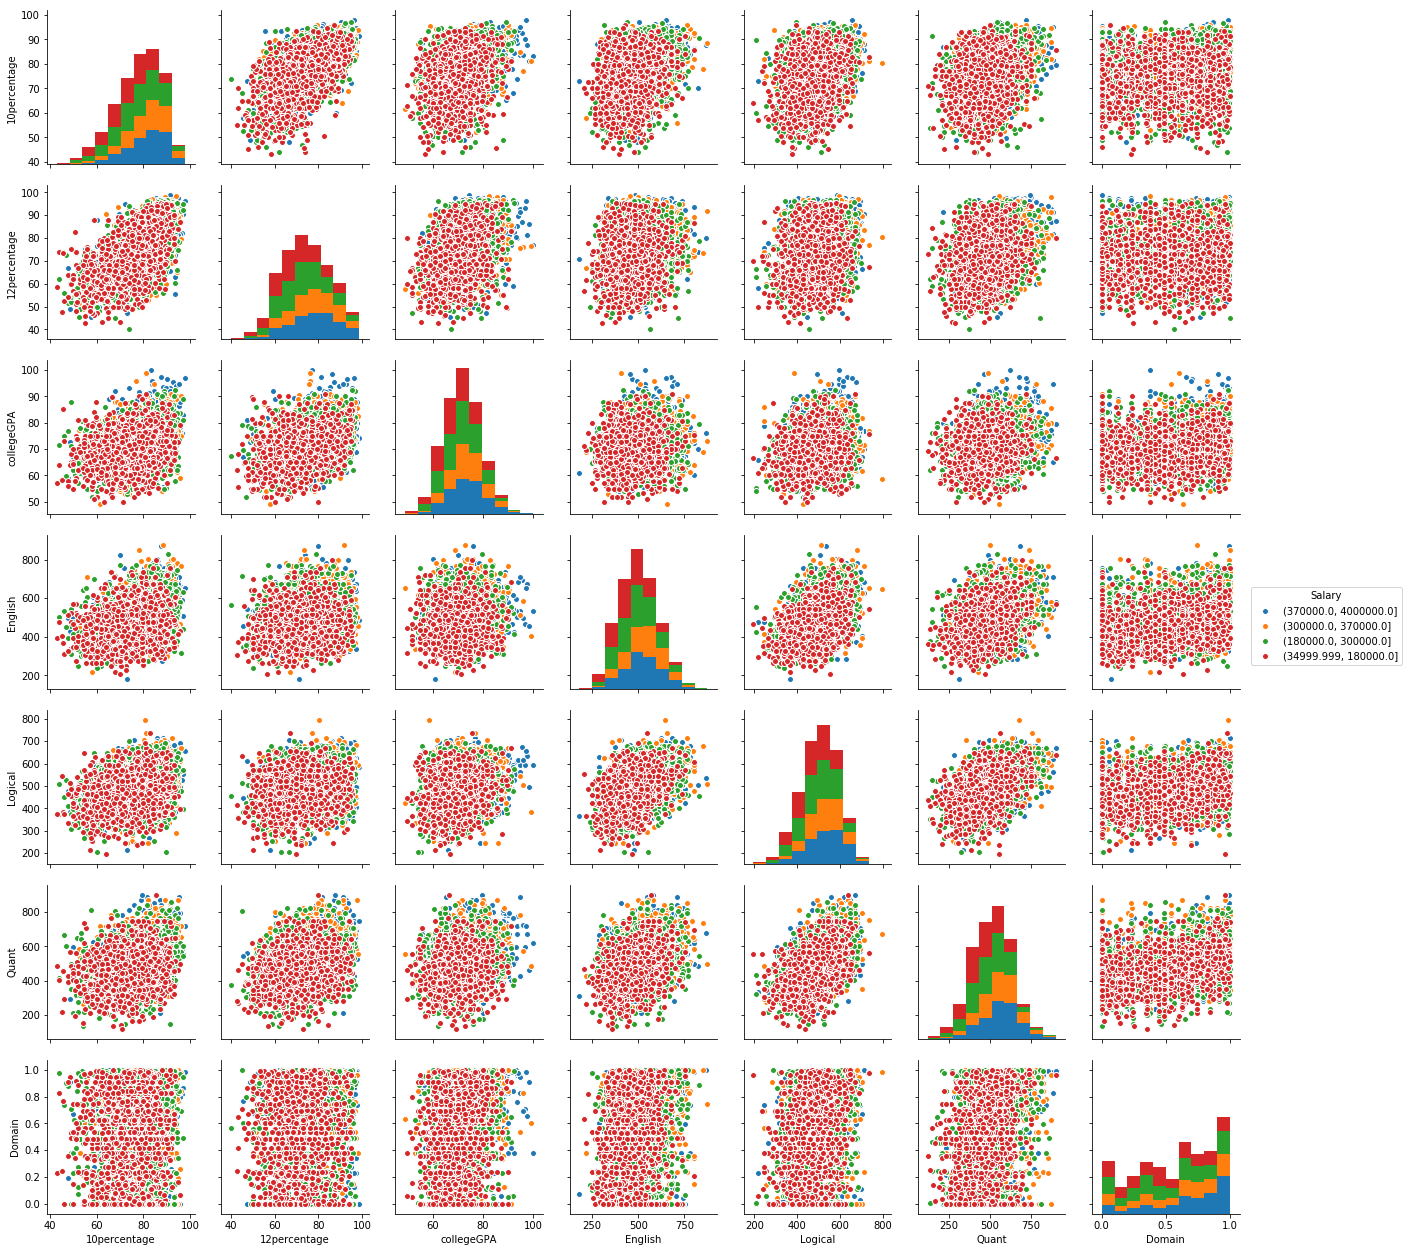

In [6]:
sns.pairplot(data,
             vars=['10percentage', '12percentage', 'collegeGPA', 'English','Logical','Quant', 'Domain'],
             hue='Salary')

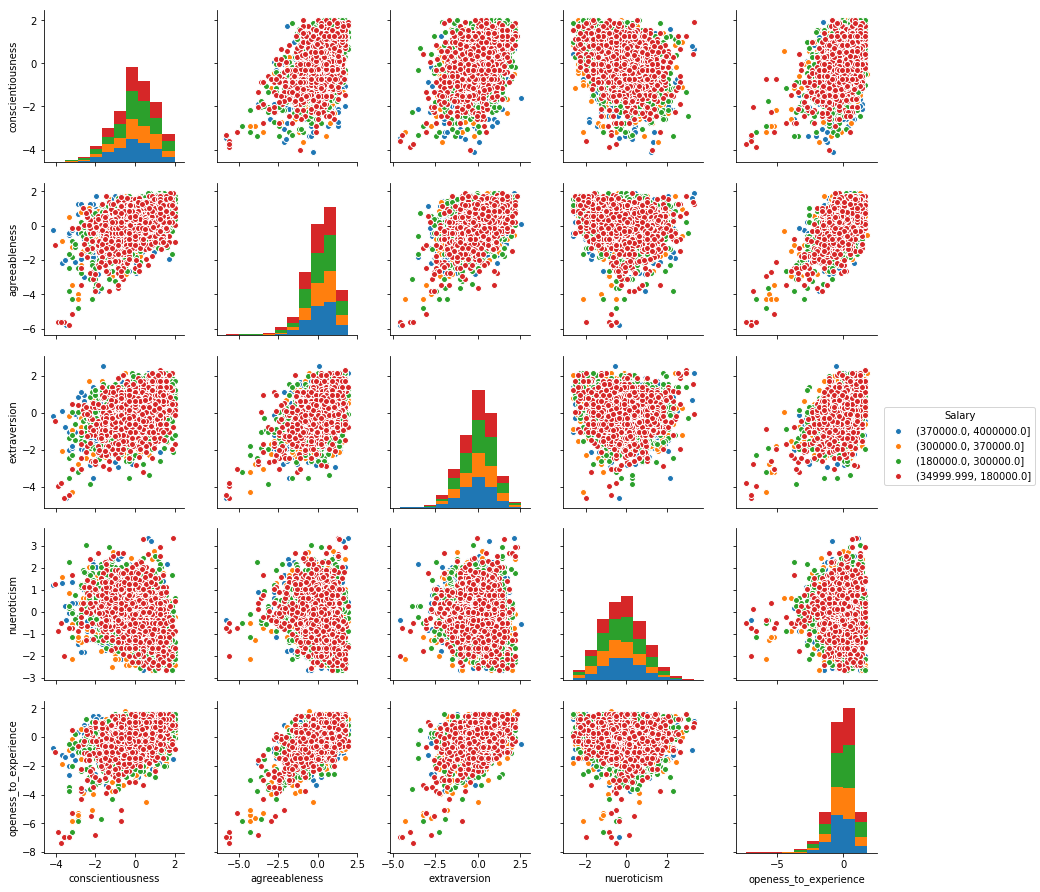

In [7]:
sns.pairplot(data,
             vars=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'],
             hue='Salary')

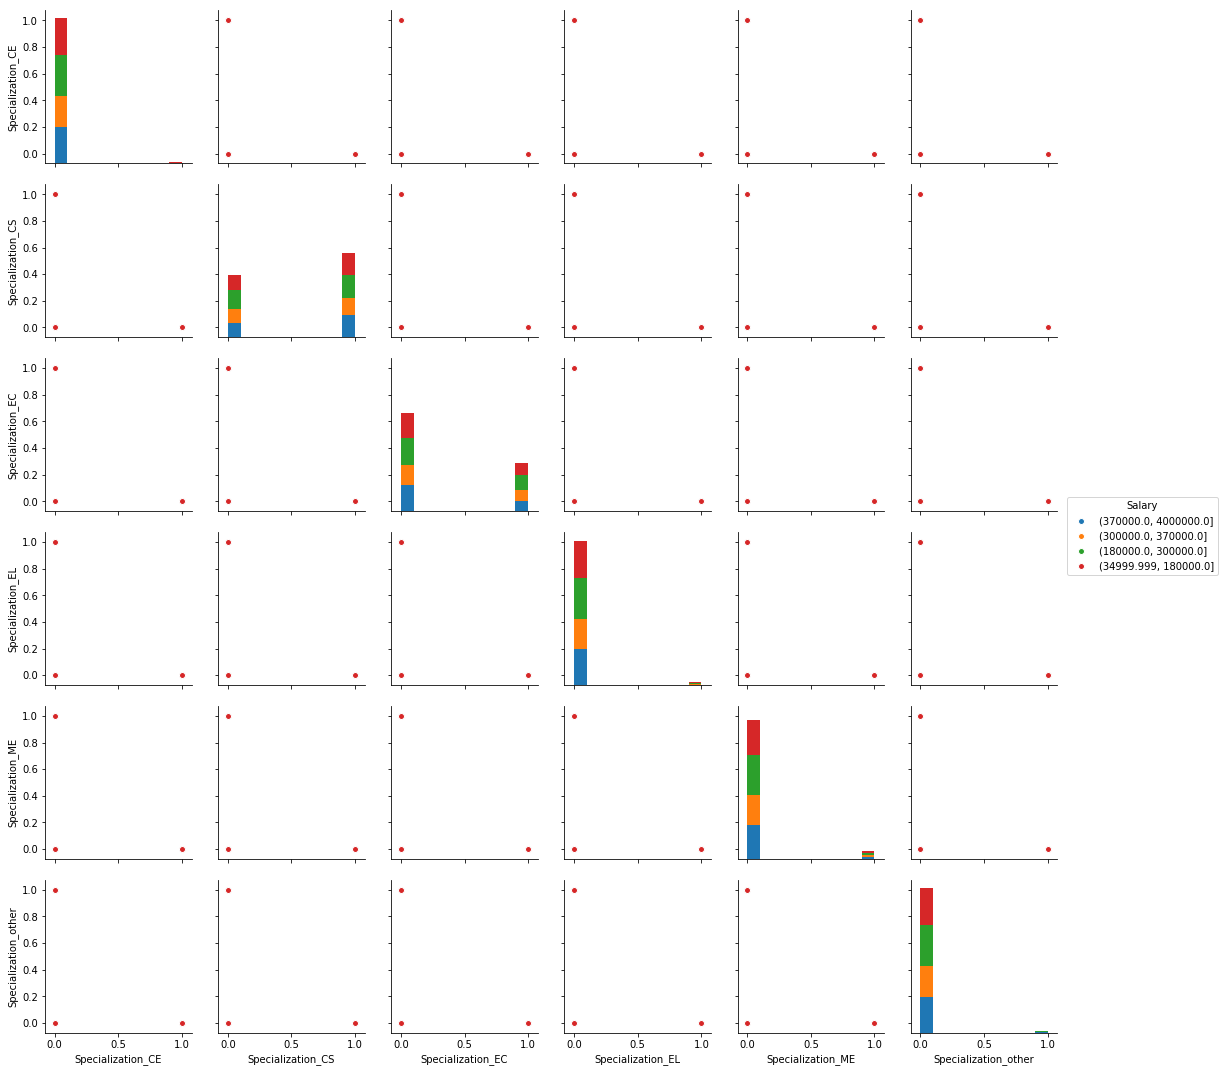

In [8]:
sns.pairplot(data,
             vars=['Specialization_CE', 'Specialization_CS', 'Specialization_EC',
                   'Specialization_EL', 'Specialization_ME', 'Specialization_other'],
             hue='Salary')

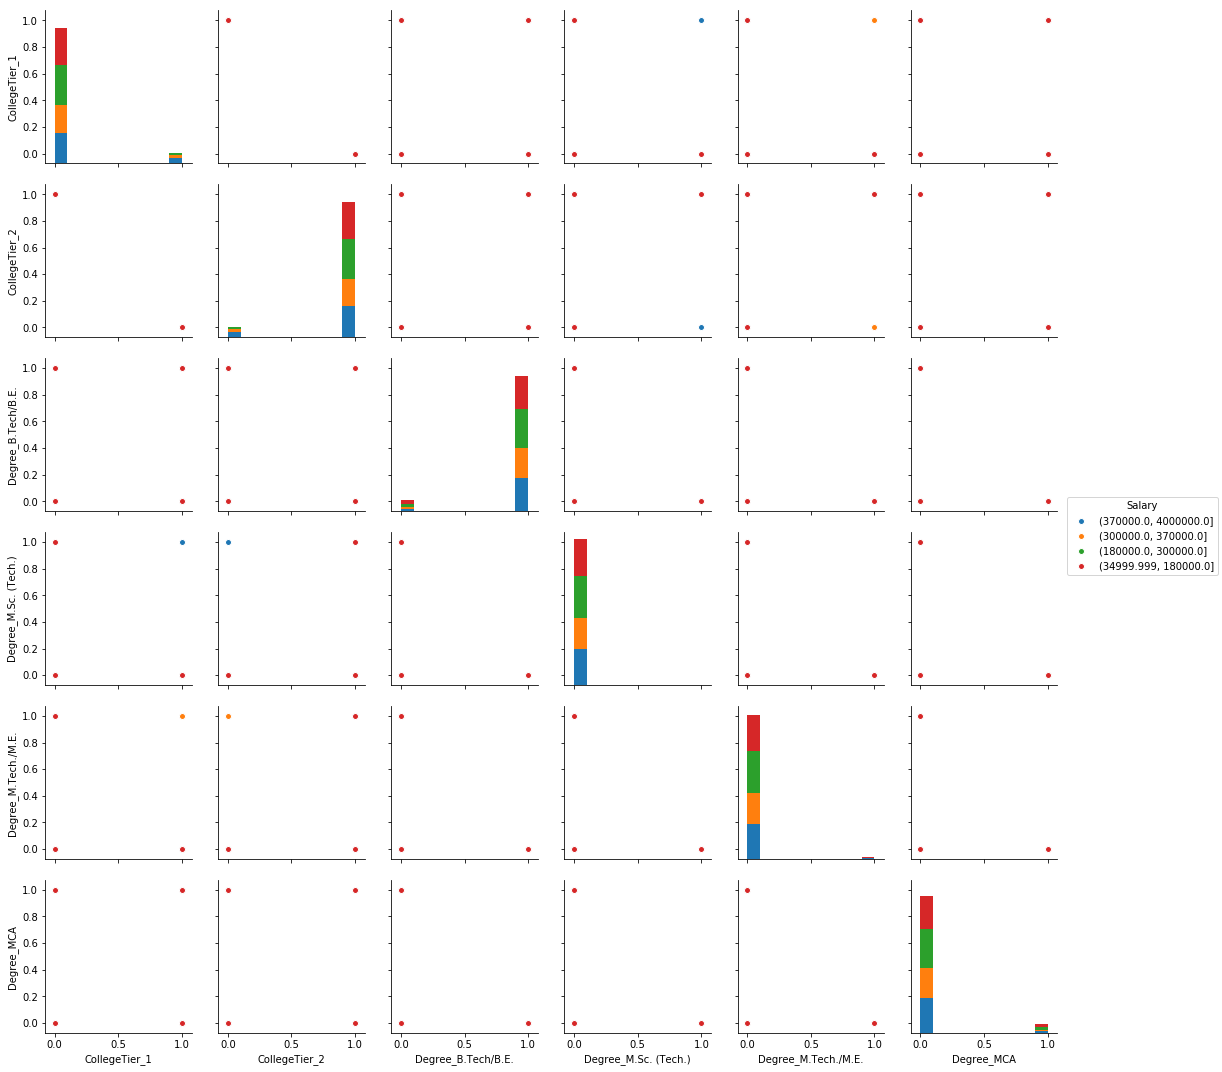

In [9]:
sns.pairplot(data,
             vars=['CollegeTier_1', 'CollegeTier_2', 'Degree_B.Tech/B.E.', 
                   'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA'],
             hue='Salary')

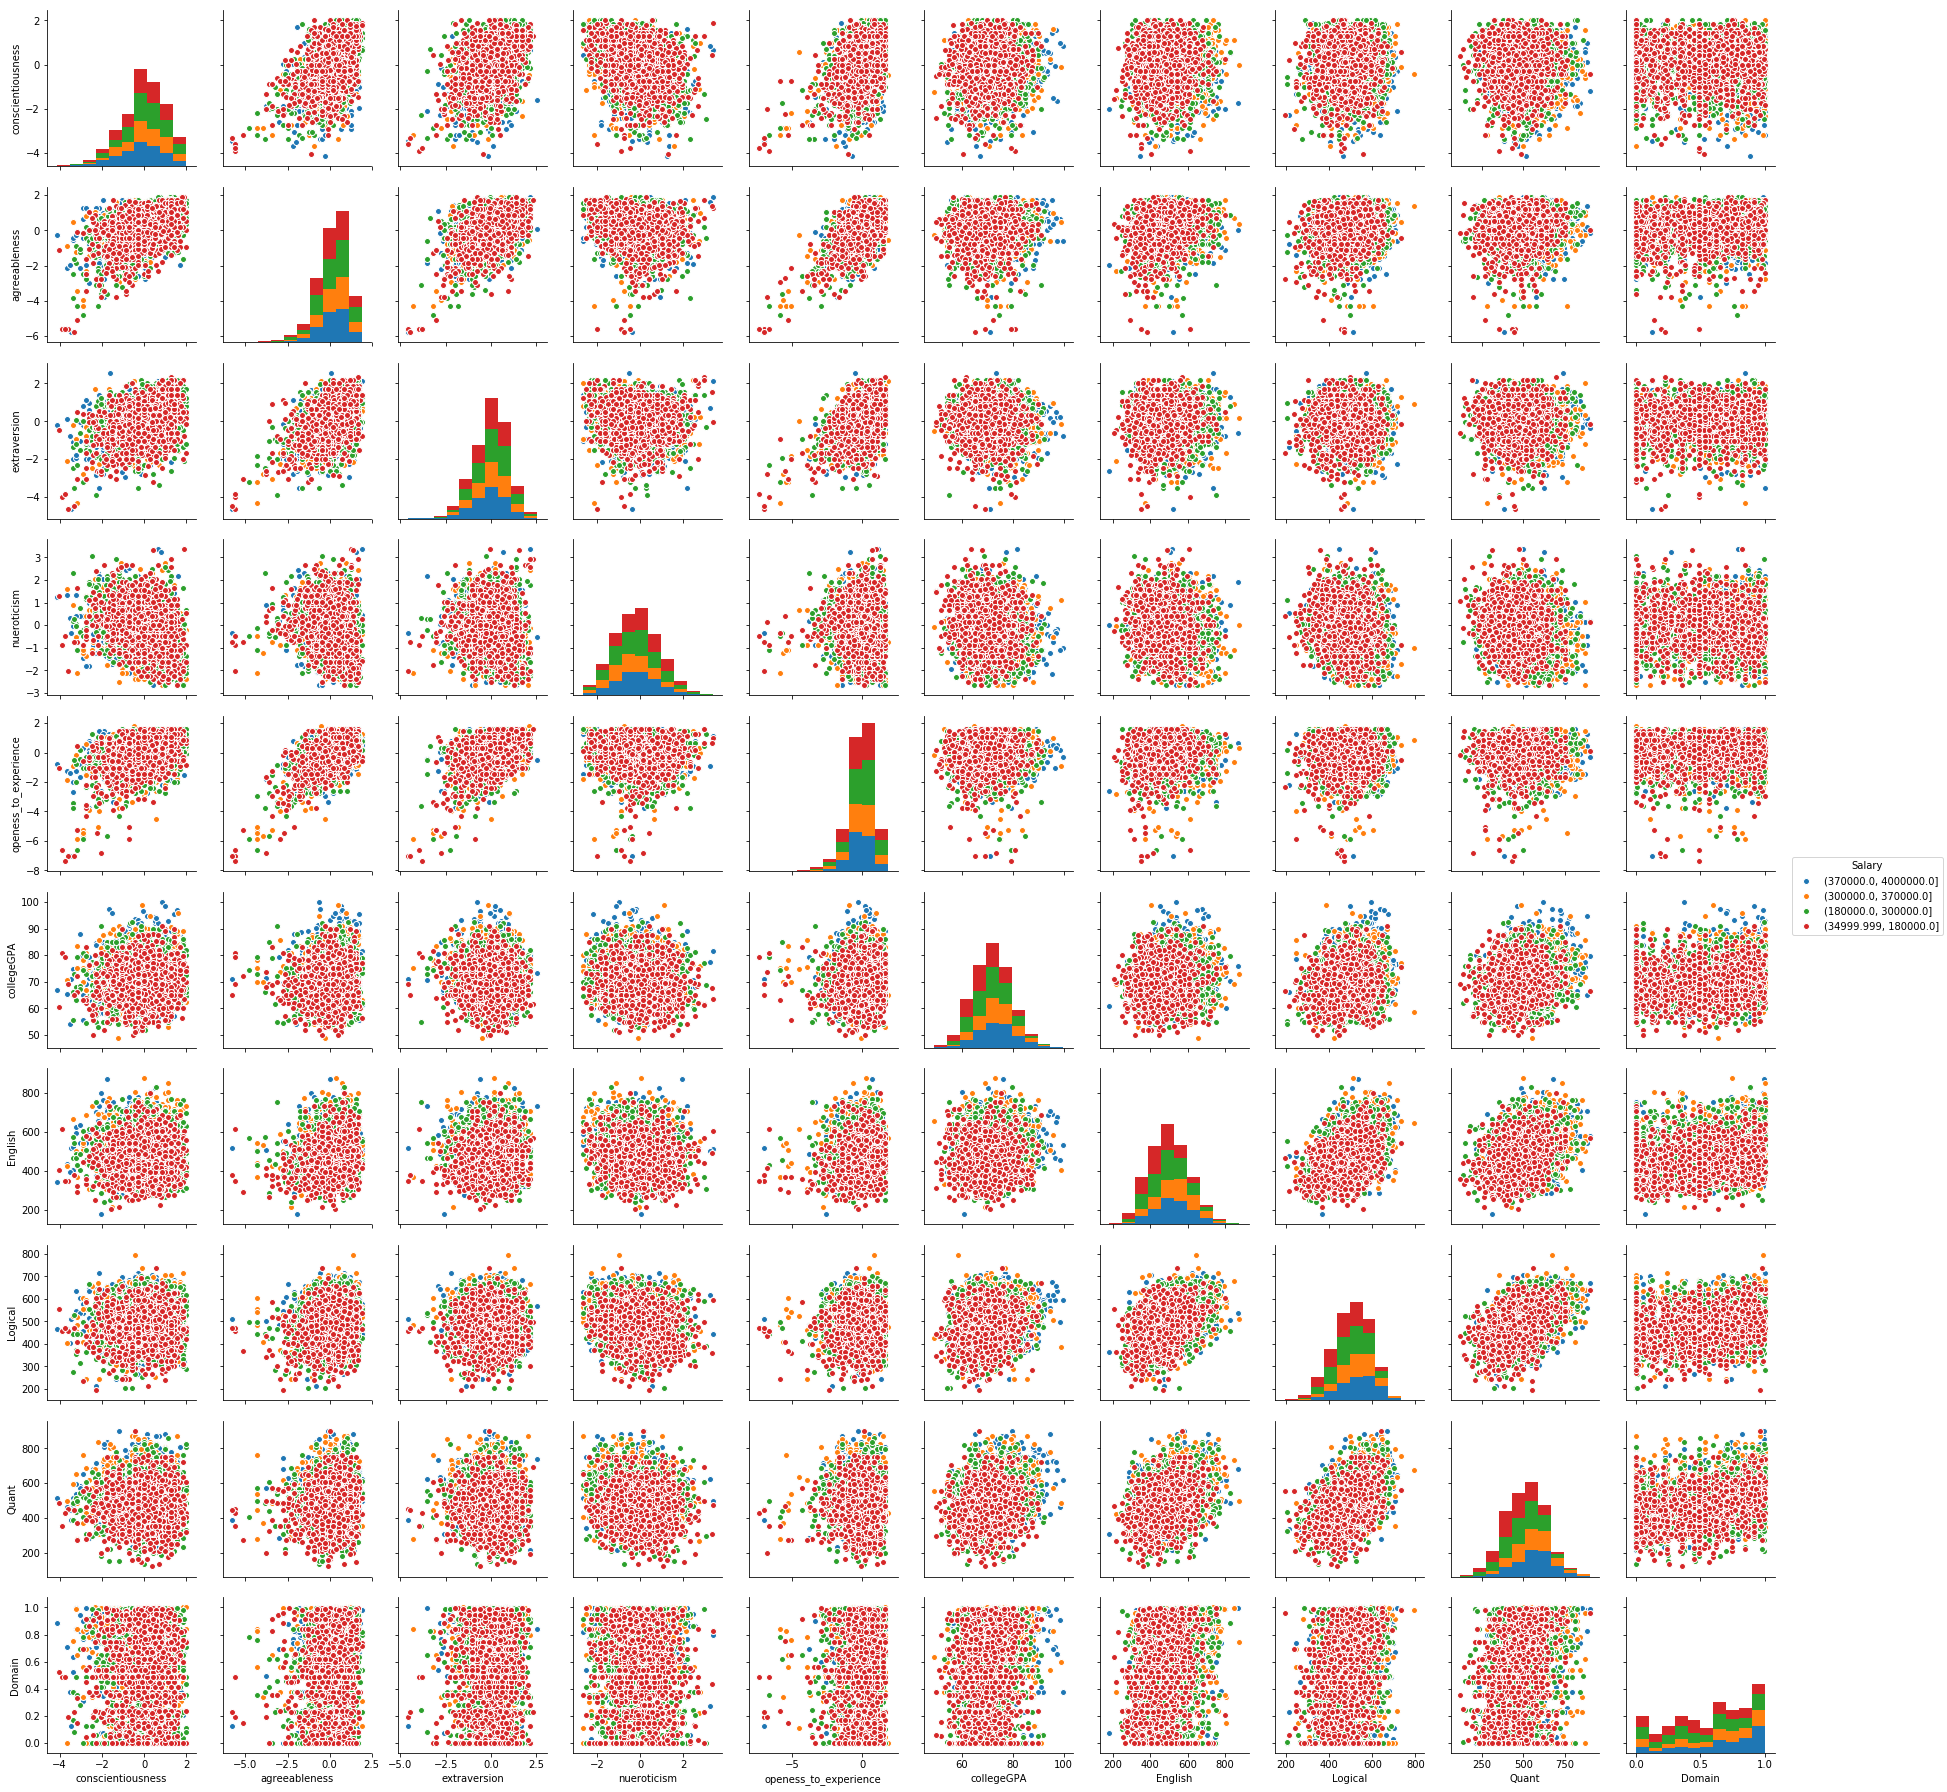

In [10]:
sns.pairplot(data,
             vars=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
                   'collegeGPA', 'English','Logical','Quant', 'Domain'],
             hue='Salary')

#### The data here is not linearly separable in any case. A single perceptron will not do a great job in classifying the data. But for demonstration and visualisation sake, we will use the features: 'Domain' and 'agreeableness'. 

In [11]:
salary_freq = salary_category['Salary'].value_counts()
salary_1 = salary_freq['(180000.0, 300000.0]']
total = salary_freq.sum()
print('Percentage of (180000.0, 300000.0]: {:.2f}'.format(salary_1 / total))

Percentage of (180000.0, 300000.0]: 0.29


In [12]:
X = graduate_data.as_matrix(columns = ['Domain', 'agreeableness'])
y = salary_category.as_matrix()

In [13]:
y1 = np.where(y == '(180000.0, 300000.0]', -1, 1)
y2 = np.where(y == '(34999.999, 180000.0]', -1, 1).ravel()
y3 = np.where(y == '(370000.0, 4000000.0]', -1, 1).ravel()
y4 = np.where(y == '(300000.0, 370000.0]', -1, 1).ravel()
y = [y1, y2, y3, y4]

### Implementing the Perceptron 

In [14]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Train the perceptron

In [15]:
clf1 = Perceptron(eta=0.001, n_iter=1000)
clf2 = Perceptron(eta=0.001, n_iter=1000)
clf3 = Perceptron(eta=0.001, n_iter=1000)
clf4 = Perceptron(eta=0.001, n_iter=1000)

clf = [clf1, clf2, clf3, clf4]

In [16]:
for i in range(4):
    clf[i].fit(X, y[i])

### Plot the training session

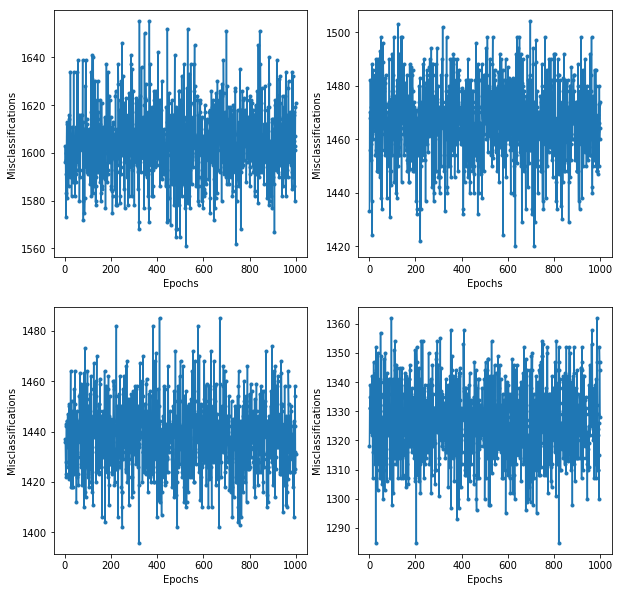

In [17]:
fig = plt.figure(figsize=(10,10))
for i in range(4):
    ax = fig.add_subplot(2,2, i+1)
    ax.plot(range(1, len(clf[i].errors_) + 1), clf[i].errors_, marker='.')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Misclassifications')

### Visualising the perceptron 

In [18]:
from matplotlib.colors import ListedColormap

In [19]:
def plot_decision_regions(X, y, classifier, resolution=0.01, ax=plt.figure()):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[np.where(y == cl), 0], y=X[np.where(y == cl), 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

<Figure size 432x288 with 0 Axes>

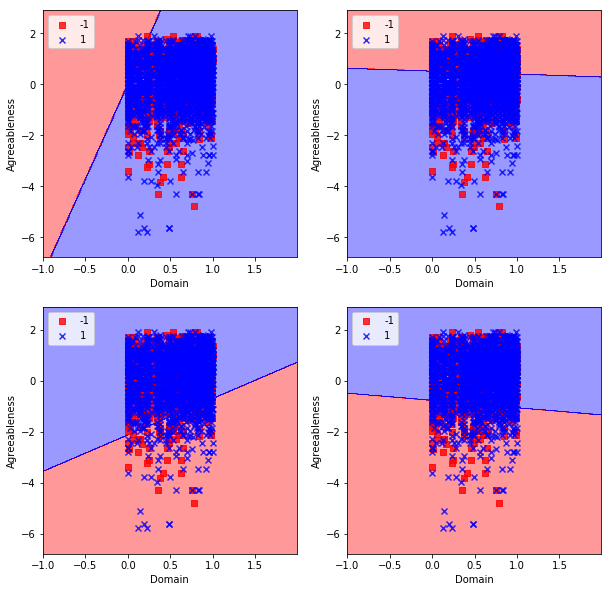

In [20]:
fig = plt.figure(figsize=(10,10))
for i in range(4):
    ax = fig.add_subplot(2,2, i+1)
    plot_decision_regions(X=X, y=y1, classifier=clf[i],ax=ax)
    ax.set_xlabel('Domain')
    ax.set_ylabel('Agreeableness')
    ax.legend(loc='upper left')